# Importing libraries and reading data

In [332]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore')
sns.set_theme(style="darkgrid",palette=sns.color_palette("muted"))

In [333]:
data = pd.read_csv("Titanic-Dataset.csv")

# Data Wrangling

In [334]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [336]:
data.duplicated().sum()

0

In [337]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [338]:
data['Embarked'] = data['Embarked'].replace({'S':'Southampton','Q':'Queenstown','C':'Cherbourg'})

## Removing unnecessary columns

In [339]:
data = data.drop(columns=["PassengerId","Name","Cabin","Ticket"])

## Cleaning up the NaNs

In [340]:
data[data["SibSp"]==8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,male,NaN,8,2,69.55,Southampton
180,0,3,female,NaN,8,2,69.55,Southampton
201,0,3,male,NaN,8,2,69.55,Southampton
324,0,3,male,NaN,8,2,69.55,Southampton
792,0,3,female,NaN,8,2,69.55,Southampton
846,0,3,male,NaN,8,2,69.55,Southampton
863,0,3,female,NaN,8,2,69.55,Southampton


In [341]:
data = data.drop(data[data["SibSp"]==8].index)

In [342]:
data.groupby(["Survived","Pclass","SibSp"])["Age"].mean()

Survived  Pclass  SibSp
0         1       0        46.375000
                  1        38.500000
                  2        44.000000
                  3        19.000000
          2       0        33.833333
                  1        34.239130
                  2        25.000000
          3       0        29.103175
                  1        27.966667
                  2        24.444444
                  3         5.428571
                  4         6.800000
                  5        10.200000
1         1       0        34.594203
                  1        36.998298
                  2        35.500000
                  3        23.500000
          2       0        29.333261
                  1        22.421875
                  2        13.250000
                  3        30.000000
          3       0        22.990333
                  1        17.277778
                  2         2.166667
                  3        33.000000
                  4         8.333333
Name: Age, dty

In [343]:
data['Age'] = data['Age'].fillna(data.groupby(["Survived","Pclass","SibSp"])["Age"].transform('mean'))

In [344]:
data[data.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [345]:
data=data.dropna().reset_index(drop=True)

## Removing outliers using zscore method

In [346]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.385488,2.306122,29.525662,0.464853,0.369615,31.799432
std,0.486986,0.835742,13.509299,0.883324,0.796919,49.781845
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.103175,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [347]:
data = data[(np.abs(stats.zscore(data[['Age','Fare']])) < 3).all(axis=1)]

# Univariate Analysis

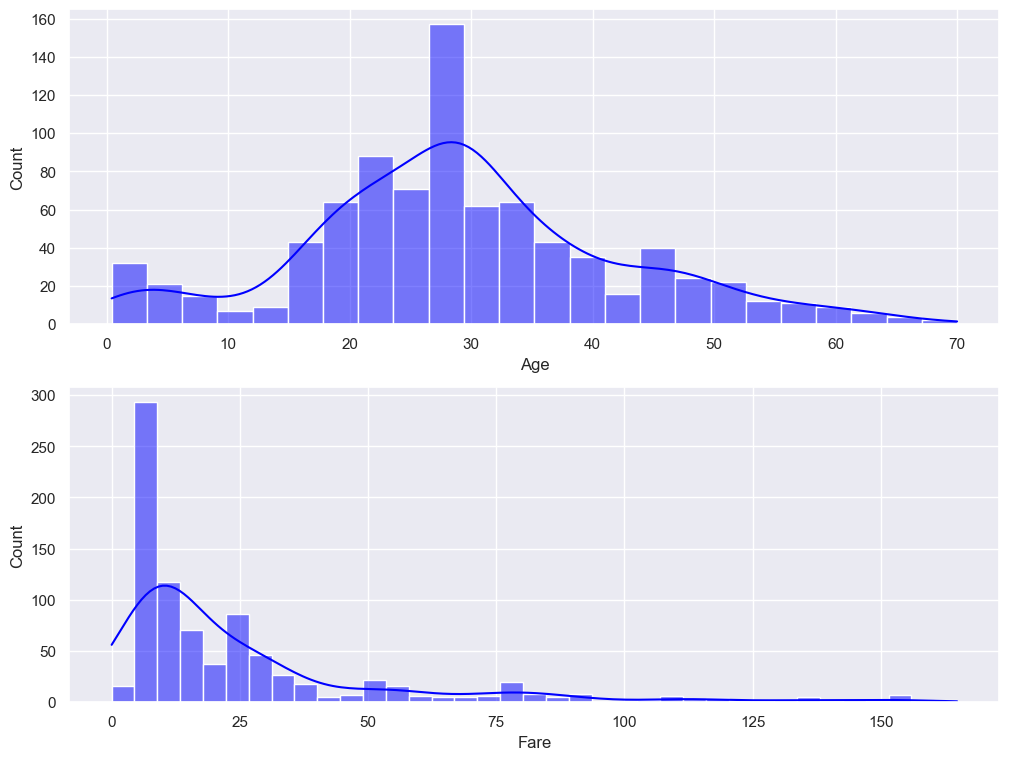

In [348]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=data,x=col,kde=True,color="blue")

In [349]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

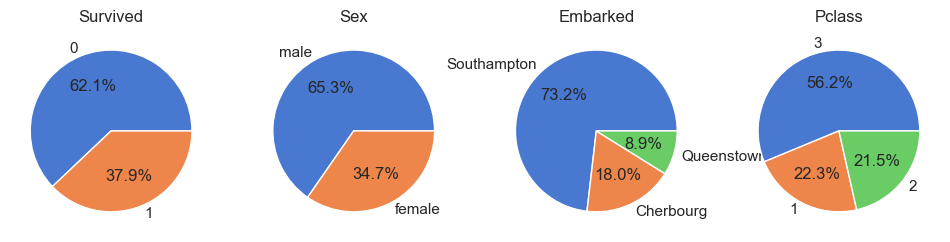

In [350]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Survived','Sex','Embarked','Pclass']):
    plt.subplot(1,4,i+1)
    x=data[col].value_counts().reset_index()
    plt.title(f"{col}")
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%")

* 62% of passengers didn't survive
* There are more males than females that could be atrributed to the crew
* 73% of passengers departed from Southampton
* 56% of passengers are from pclass 3

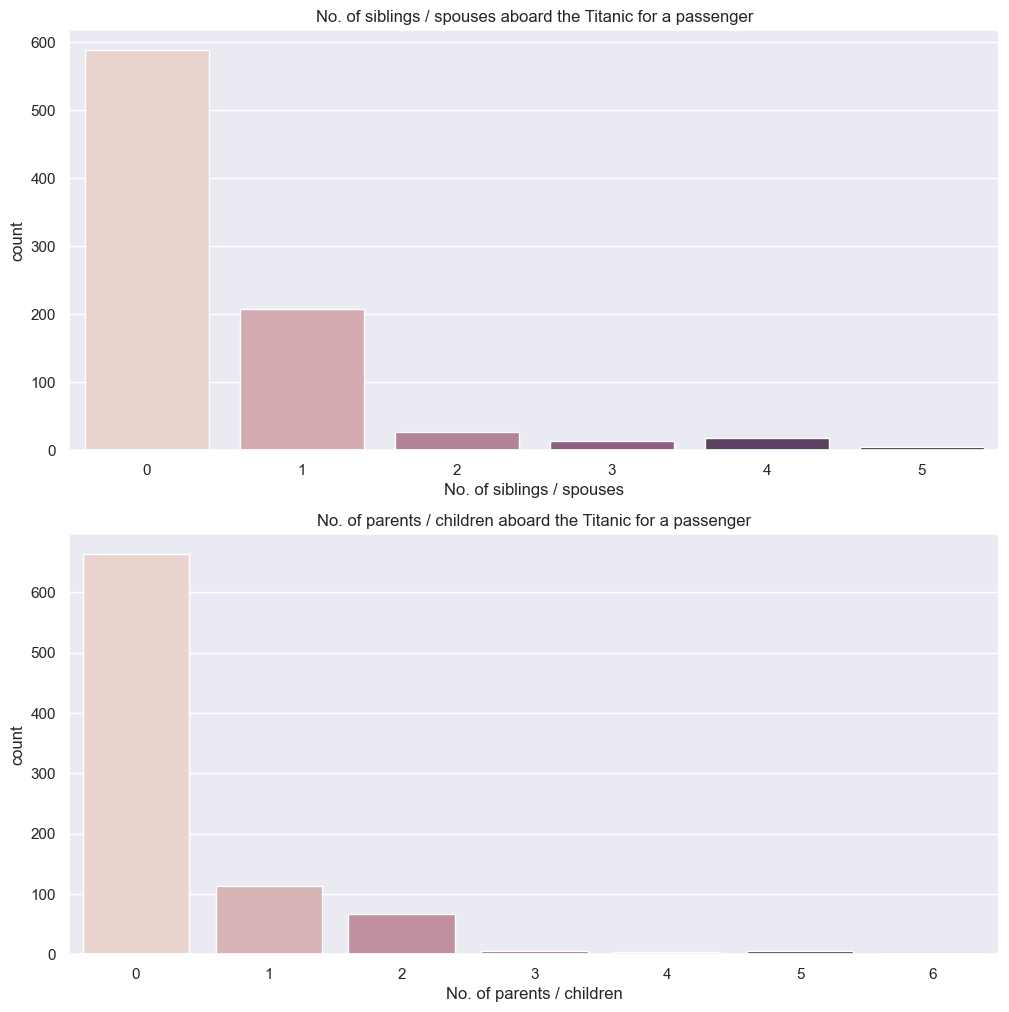

In [351]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.countplot(data=data,x="SibSp",legend=False,hue="SibSp")
plt.title("No. of siblings / spouses aboard the Titanic for a passenger")
plt.xlabel("No. of siblings / spouses")

plt.subplot(2,1,2)
sns.countplot(data=data,x="Parch",hue="Parch",legend=False)
plt.title("No. of parents / children aboard the Titanic for a passenger")
plt.xlabel("No. of parents / children")

plt.show()

 * Most passengers had no siblings or spouses or had one
 * Most passengers had no parents or children

# Multivariate Analysis

In [352]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.270726
1    27.438023
Name: Age, dtype: float64

## Average age of passengers who survived vs those who didn't

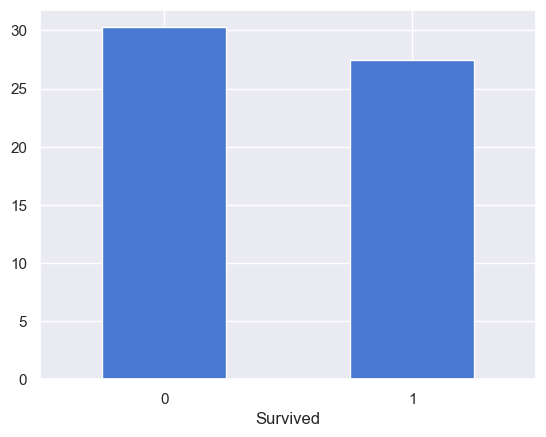

In [353]:
data.groupby("Survived")["Age"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

* The Average age of passengers who did not survive is higher than those who didn't

## Average Fare of passengers who survived vs those who didn't

In [354]:
data.groupby("Survived")["Fare"].mean()

Survived
0    19.026055
1    37.567334
Name: Fare, dtype: float64

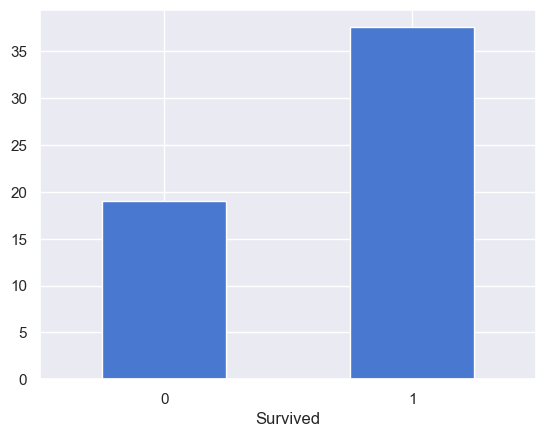

In [355]:
data.groupby("Survived")["Fare"].mean().plot(kind = "bar")
plt.xticks(rotation=0)
plt.show()

## Does Passenger ticket class affect survival?

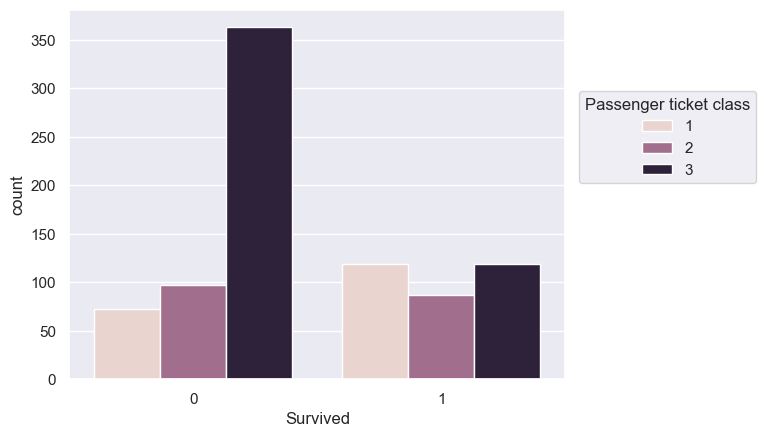

In [356]:
sns.countplot(data=data,x="Survived",hue="Pclass")
plt.legend(bbox_to_anchor=(1.4,0.8),title="Passenger ticket class")
plt.show()

* The Fare for the passengers who didn't survive is lower than for those who did
* That can be explained as most passengers who died are from pclass 3 while pclass 1 had the least amount of deaths

## Relation between age and fare by survival

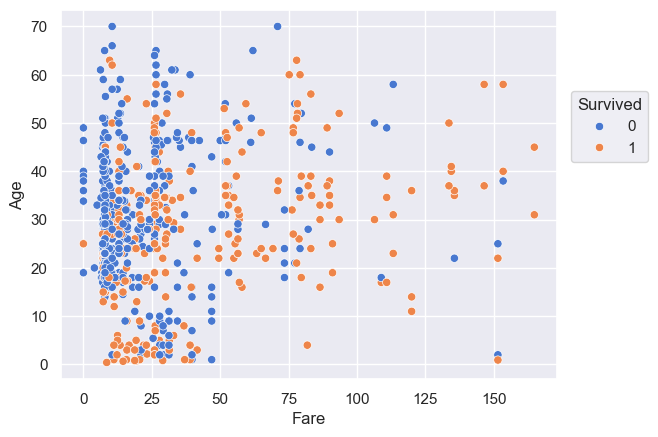

In [357]:
sns.scatterplot(data=data,x="Fare",y="Age",hue="Survived")
plt.legend(bbox_to_anchor=(1.2,0.8),title="Survived")
plt.show()

## Does Gender affect survival?

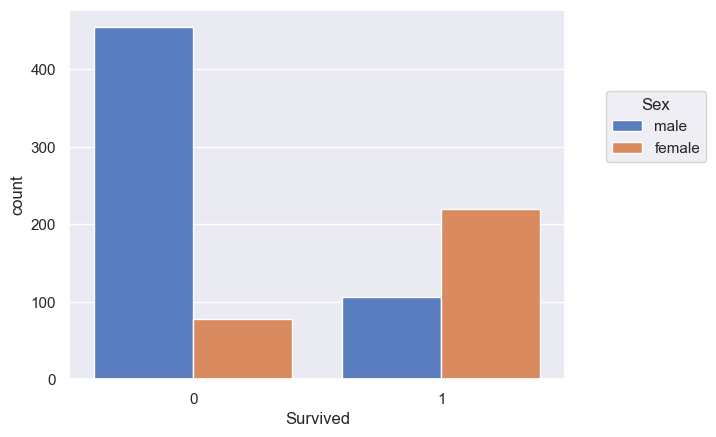

In [358]:
sns.countplot(data=data,x="Survived",hue="Sex")
plt.legend(bbox_to_anchor=(1.3,0.8),title="Sex")
plt.show()

* Alot more males died than females, that is probable because they evacuate women and children first

## Does the Number of siblings\spouses or children/parents affect survival?

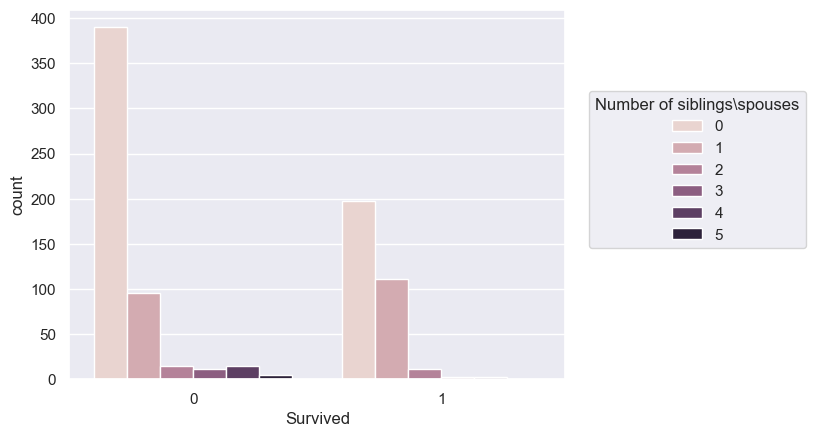

In [359]:
sns.countplot(data=data,x="Survived",hue="SibSp")
plt.legend(bbox_to_anchor=(1.5,0.8),title="Number of siblings\spouses")
plt.show()

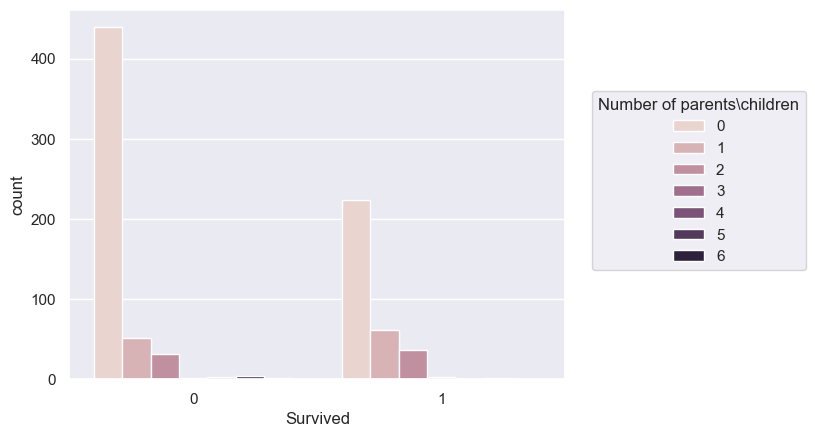

In [360]:
sns.countplot(data=data,x="Survived",hue="Parch")
plt.legend(bbox_to_anchor=(1.5,0.8),title="Number of parents\children")
plt.show()

* There is almost no relation between number of parents/children and number of siblings/spouses to survival

# Importing libraries for machine learning and transforming data

In [361]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import scikitplot as skplt

## One hot enocding the categorical columns using pd dummies

In [362]:
def one_hot_encoding(data=None):
    dums = pd.get_dummies(data[["Sex","Embarked"]],dtype=int)
    dums_data = pd.concat([dums,data],axis=1).drop(columns=['Sex','Embarked']).reset_index(drop=True)
    return dums_data

In [363]:
model_data = one_hot_encoding(data)

In [364]:
model_data

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.000000,1,0,7.2500
1,1,0,1,0,0,1,1,38.000000,1,0,71.2833
2,1,0,0,0,1,1,3,26.000000,0,0,7.9250
3,1,0,0,0,1,1,1,35.000000,1,0,53.1000
4,0,1,0,0,1,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
852,0,1,0,0,1,0,2,27.000000,0,0,13.0000
853,1,0,0,0,1,1,1,19.000000,0,0,30.0000
854,1,0,0,0,1,0,3,27.966667,1,2,23.4500
855,0,1,1,0,0,1,1,26.000000,0,0,30.0000


## Correlation between model data columns

In [365]:
corr = model_data.corr()

<Axes: >

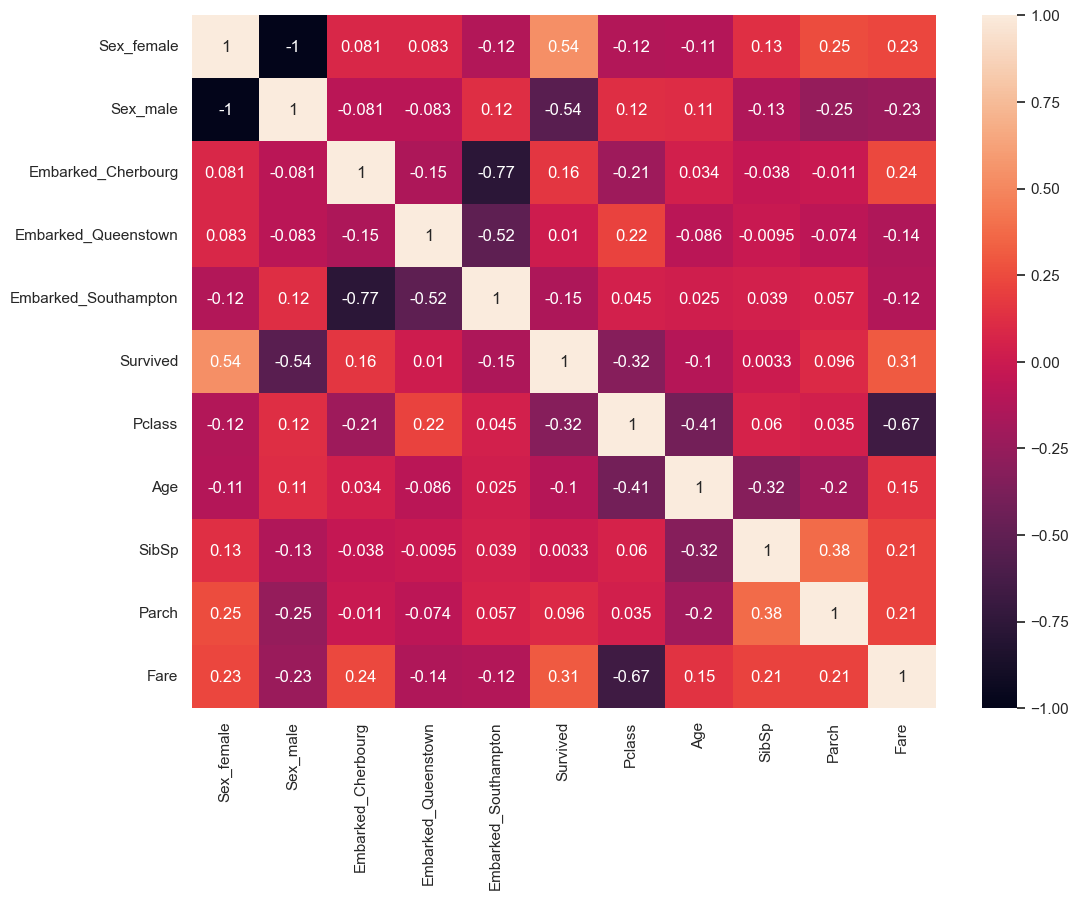

In [366]:
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)

# Splitting data and training Gradient Boosting Classifier

In [367]:
X = model_data.drop(columns="Survived")
y = model_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

## Normalizing the Data using min max scaler

In [368]:
scaler = MinMaxScaler()
scaler.fit(X[['Fare','Age']])
X[['Fare','Age']]=scaler.transform(X[['Fare','Age']])

In [369]:
gbc_model = GradientBoostingClassifier()

In [370]:
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

# Evaluating Gradient Boosting Classifier

In [371]:
gbc_model.score(X_train,y_train)

0.9036496350364963

In [372]:
gbc_model.score(X_test,y_test)

0.877906976744186

In [373]:
score = cross_val_score(gbc_model,X,y,cv=10)
avg = np.mean(score)
print(f"cross validation score for Gradient Boost:{score}")
print(f"average cross validation score for Gradient Boost:{avg}\n")

cross validation score for Gradient Boost:[0.8372093  0.8255814  0.80232558 0.88372093 0.86046512 0.87209302
 0.86046512 0.83529412 0.84705882 0.85882353]
average cross validation score for Gradient Boost:0.8483036935704513



In [374]:
y_predicted = gbc_model.predict(X_test)
y_proba=gbc_model.predict_proba(X_test)

In [375]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       109
           1       0.86      0.79      0.83        63

    accuracy                           0.88       172
   macro avg       0.87      0.86      0.87       172
weighted avg       0.88      0.88      0.88       172



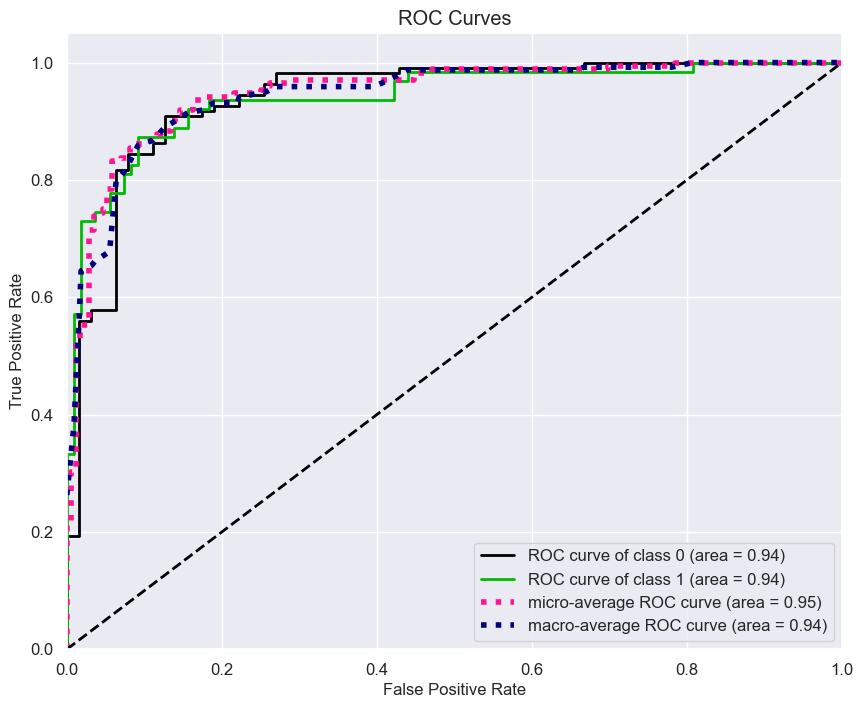

In [376]:
skplt.metrics.plot_roc(y_test,y_proba,figsize=(10,8))
plt.show()

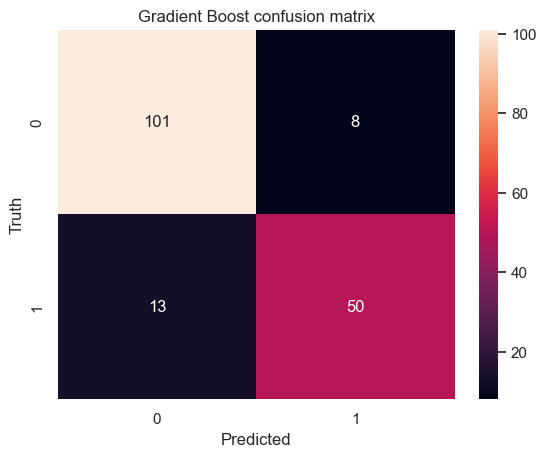

In [377]:
cm = skplt.metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Gradient Boost confusion matrix")
plt.show()

# Predicting new data row

In [378]:
new_data = pd.DataFrame({'Pclass':[3],'Sex':['male'],'Age':[52],'SibSp':[1],'Parch':[1],'Fare':[12],
                        'Embarked':['Southampton']})

## Transforming the data

In [379]:
new_data =one_hot_encoding(new_data)
new_data =new_data.reindex(columns=X.columns,fill_value=0)
new_data[['Fare','Age']]=scaler.transform(new_data[['Fare','Age']])

In [380]:
new_data

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,3,0.741305,1,1,0.072786


In [381]:
prediction= gbc_model.predict(new_data)
if prediction == 0:
    print("Passenger didn't survive")
else:
    print("Passenger survived")

Passenger didn't survive


#### * Gradeint Boosting Classifier acheived 88% accuracy on test data
#### * it acheived 85% in cross validation score
#### * It had Average ROC area of 0.95